## DEPLOYMENT - FOLIUM - RAINFALL TIME SERIES FORECASTING - KERALA - HTML

In [2]:
import warnings
warnings.filterwarnings("ignore")

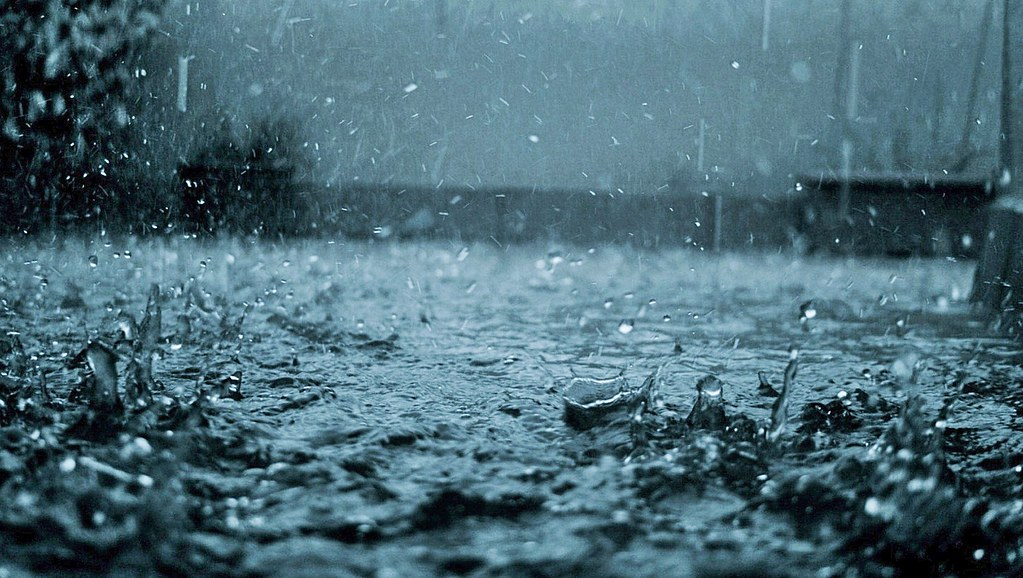

In [4]:
!python -m pip install --upgrade pip

In [5]:
import sys
!"{sys.executable}" -m pip install folium


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\GAYATHRI G MURALI\anaconda3\python.exe -m pip install --upgrade pip


In [6]:
# Importing Libraries
import folium
import json
print("✅ Folium and JSON imported successfully!")

✅ Folium and JSON imported successfully!


In [7]:
# Load GeoJSON File
with open("state.geojson", "r", encoding="utf-8") as f:
    kerala_geojson = json.load(f)

In [8]:
# Predicted Values From ( 2025 - 2030 )
future_years = [2025, 2026, 2027, 2028, 2029, 2030]
future_predictions =[53929.17, 52886.41, 54020.01, 54448.36, 54710.53, 55310.82] # mm values

In [9]:
# Load Kerala GeoJSON
with open("state.geojson", "r", encoding="utf-8") as f:
    kerala_geojson = json.load(f)

# Function to assign colors based on precipitation values
def get_color(value):
    if value > 55000:
        return '#08306b'  # Very dark blue
    elif value > 54500:
        return '#08519c'
    elif value > 54000:
        return '#2171b5'
    elif value > 53500:
        return '#4292c6'
    elif value > 53000:
        return '#6baed6'
    elif value > 52000:
        return '#9ecae1'
    else:
        return '#c6dbef'  # Lightest blue

# Create base map centered on Kerala
m = folium.Map(location=[10.5, 76.5], zoom_start=7, tiles='CartoDB positron')

# Loop through each year and create a layer
for year, value in zip(future_years, future_predictions):
    year_layer = folium.FeatureGroup(name=f"{year} - {value:.2f} mm")

    folium.GeoJson(
        kerala_geojson,
        style_function=lambda x, val=value: {
            'fillColor': get_color(val),
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6,
        }
    ).add_to(year_layer)

    # Add popup marker with precipitation value
    folium.Marker(
        location=[10.15, 76.6],  # Near center of Kerala
        popup=f"{year} Predicted Precipitation: {value:.2f} mm",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(year_layer)

    # Add this year layer to the map
    year_layer.add_to(m)

#  Add layer control to toggle years
folium.LayerControl(collapsed=False).add_to(m)

#  Save the map to an HTML file
m.save("kerala_precipitation_combined.html")

In [10]:
# Webview
import webbrowser
webbrowser.open("kerala_precipitation_combined.html")

True